<a href="https://colab.research.google.com/github/sourabhhegde/Traffic-data-prediction/blob/main/Sourabh_hegde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Volume Prediction Notebook**

This notebook showcases a step-by-step approach for preparing, cleaning, and modeling a real-world traffic volume dataset. We employ various techniques including data cleaning, feature engineering, and model training with XGBoost. Finally, we generate predictions for a test dataset.

---

## **Mounting Drive and Importing Libraries**

Below, we import the primary libraries for data manipulation, visualization, and modeling.


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data (replace with the correct file path or URL)
df = pd.read_csv('/content/drive/MyDrive/Data_Science_Challenge_1/Train_data.csv')

---

## **Loading and Exploring the Dataset**

We load the training data from a CSV file and do an initial exploration—checking the first few rows, data types, and basic statistics.


In [ ]:
# Display the first few rows
print(df.head())

   Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc         TimeStamp        Date  \
0  Cloudy skies  Partly cloudy skies   02-10-2015 9:00  02-10-2015   
1  Cloudy skies    Fragmented clouds  02-10-2015 10:00  02-10-2015   
2  Cloudy skies     Full cloud cover  02-10-2015 11:00  02-10-2015   
3  Cloudy skies     Full cloud cover  02-10-2015 12:00  02-10-2015   
4  Cloudy skies    Fragmented clouds  02-10-2015 13:00  02-10-2015   

   Traffic_Vol  
0      7639.32  
1      6300.32  
2      6621.42  
3      6958.12  
4      6824.2

In [ ]:
# Check the overall structure
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             40 non-null     float64
 1   Temperature         30000 non-null  float64
 2   Rainfall_last_hour  30000 non-null  float64
 3   Snowfall_last_hour  30000 non-null  float64
 4   Cloud_Cover         30000 non-null  int64  
 5   Weather             30000 non-null  object 
 6   Weather_Desc        30000 non-null  object 
 7   TimeStamp           30000 non-null  object 
 8   Date                30000 non-null  object 
 9   Traffic_Vol         30000 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.3+ MB
None


In [ ]:
# Get summary statistics
print(df.describe())


       Holiday   Temperature  Rainfall_last_hour  Snowfall_last_hour  \
count     40.0  30000.000000        30000.000000        30000.000000   
mean       1.0    281.335409            0.418887            0.000164   
std        0.0     13.932974           56.767957            0.006700   
min        1.0      0.300000            0.000000            0.000000   
25%        1.0    272.267750            0.000000            0.000000   
50%        1.0    282.385000            0.000000            0.000000   
75%        1.0    292.170000            0.000000            0.000000   
max        1.0    309.040000         9831.414286            0.512857   

        Cloud_Cover   Traffic_Vol  
count  30000.000000  30000.000000  
mean      45.333667   4675.901533  
std       38.673130   2579.948862  
min        0.000000    423.020000  
25%        1.000000   2021.695000  
50%       41.000000   4817.670000  
75%       90.000000   6843.720000  
max      101.000000   9893.520000  


Holiday               29960
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64


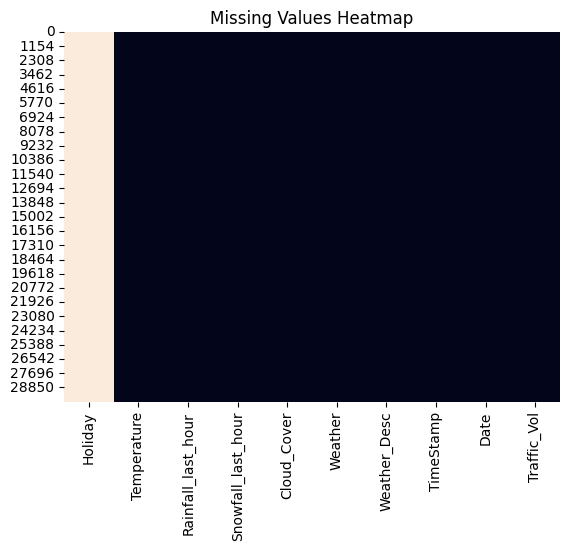

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data pattern (optional)
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


### **3.2 Converting and Grouping Holiday Flags**

We ensure holidays are flagged for the entire day if any record in that day is marked as a holiday.


In [ ]:
import pandas as pd
import pandas as pd

# Convert to datetime, explicitly specifying the format and handling errors
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Create a date column for grouping
df['Date'] = df['TimeStamp'].dt.date

# If 'Holiday' is NaN for non-holiday rows, fill with 0
df['Holiday'] = df['Holiday'].fillna(0)

# Convert to int if needed
df['Holiday'] = df['Holiday'].astype(int)

# For each date, if any record is 1, make the entire day 1
df['Holiday'] = df.groupby('Date')['Holiday'].transform('max')

# Convert back to int if you like
df['Holiday'] = df['Holiday'].astype(int)

# Drop the date column if you're done with it
df.drop(columns='Date', inplace=True)

# Double-check
print(df[['TimeStamp','Holiday']].head(50))
print(df['Holiday'].value_counts())





             TimeStamp  Holiday
0  2015-10-02 09:00:00        0
1  2015-10-02 10:00:00        0
2  2015-10-02 11:00:00        0
3  2015-10-02 12:00:00        0
4  2015-10-02 13:00:00        0
5  2015-10-02 14:00:00        0
6  2015-10-02 15:00:00        0
7  2015-10-02 16:00:00        0
8  2015-10-02 17:00:00        0
9  2015-10-02 18:00:00        0
10 2015-10-02 19:00:00        0
11 2015-10-02 20:00:00        0
12 2015-10-02 21:00:00        0
13 2015-10-02 22:00:00        0
14 2015-10-02 23:00:00        0
15 2015-10-03 00:00:00        0
16 2015-10-03 01:00:00        0
17 2015-10-03 02:00:00        0
18 2015-10-03 03:00:00        0
19 2015-10-03 04:00:00        0
20 2015-10-03 05:00:00        0
21 2015-10-03 06:00:00        0
22 2015-10-03 08:00:00        0
23 2015-10-03 09:00:00        0
24 2015-10-03 12:00:00        0
25 2015-10-03 13:00:00        0
26 2015-10-03 14:00:00        0
27 2015-10-03 15:00:00        0
28 2015-10-03 16:00:00        0
29 2015-10-03 18:00:00        0
30 2015-

### **3.3 Extracting Time-based Features**

We extract hour, day of week, and create a weekend flag. We also optionally add cyclical encoding for hour.


In [ ]:
df['hour'] = df['TimeStamp'].dt.hour
df['day'] = df['TimeStamp'].dt.day
df['day_of_week'] = df['TimeStamp'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['TimeStamp'].dt.month

# Check the new features
print(df[['TimeStamp', 'hour', 'day', 'day_of_week', 'month']].head())

            TimeStamp  hour  day  day_of_week  month
0 2015-10-02 09:00:00     9    2            4     10
1 2015-10-02 10:00:00    10    2            4     10
2 2015-10-02 11:00:00    11    2            4     10
3 2015-10-02 12:00:00    12    2            4     10
4 2015-10-02 13:00:00    13    2            4     10


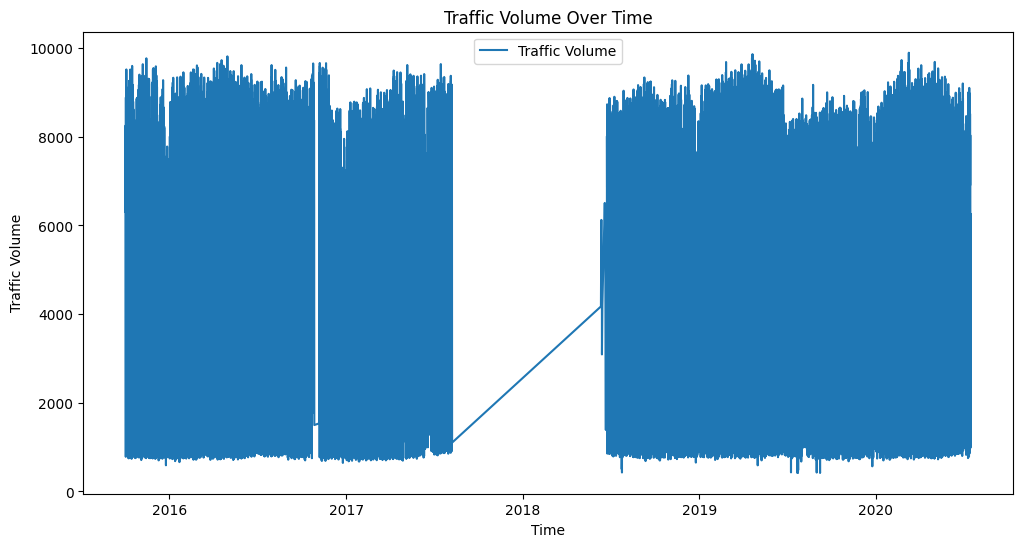

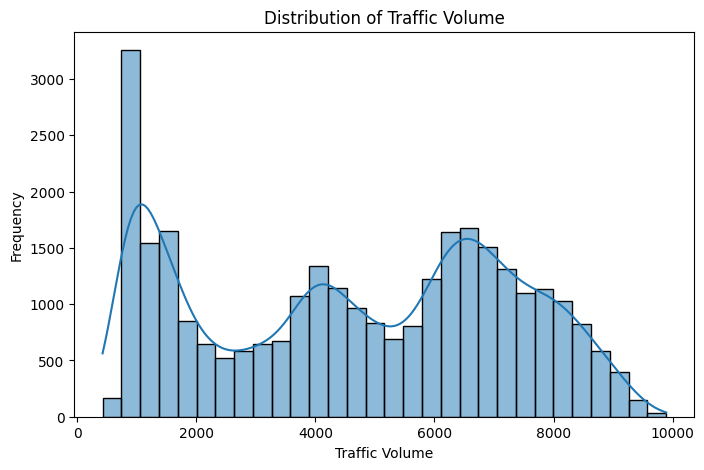

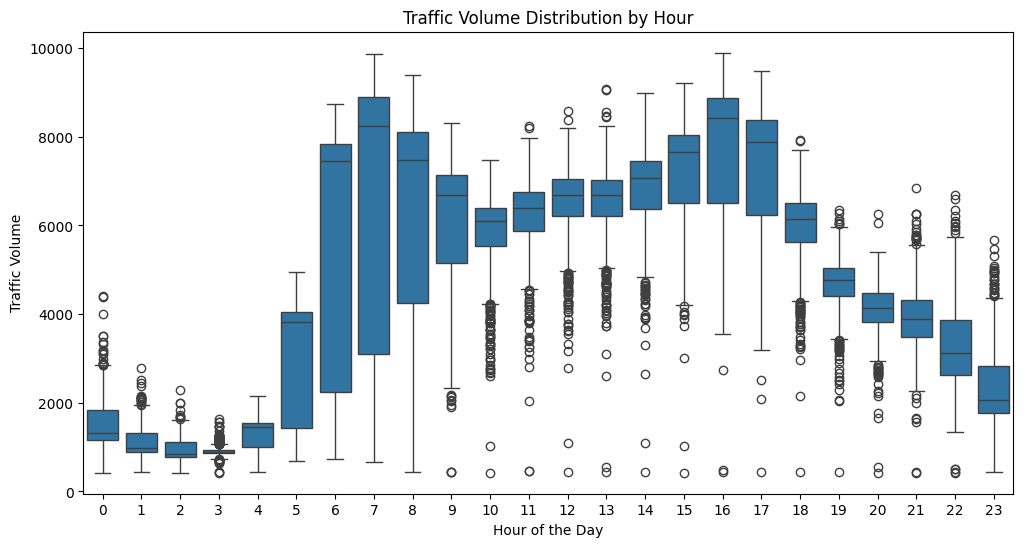

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['TimeStamp'], df['Traffic_Vol'], label='Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()

# Histogram of Traffic Volume
plt.figure(figsize=(8, 5))
sns.histplot(df['Traffic_Vol'], bins=30, kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Boxplot by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Traffic_Vol', data=df)
plt.title('Traffic Volume Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.show()


We observed a significant gap in the dataset from July 2017 to June 2018. This discontinuity complicates the use of traditional time series models (e.g., ARIMA, LSTM), which assume consistent intervals and continuous temporal data. Therefore, we chose a tree-based model that doesn't strictly rely on contiguous time steps. This approach allows us to utilize the available data effectively without attempting to impute or artificially fill in the missing period

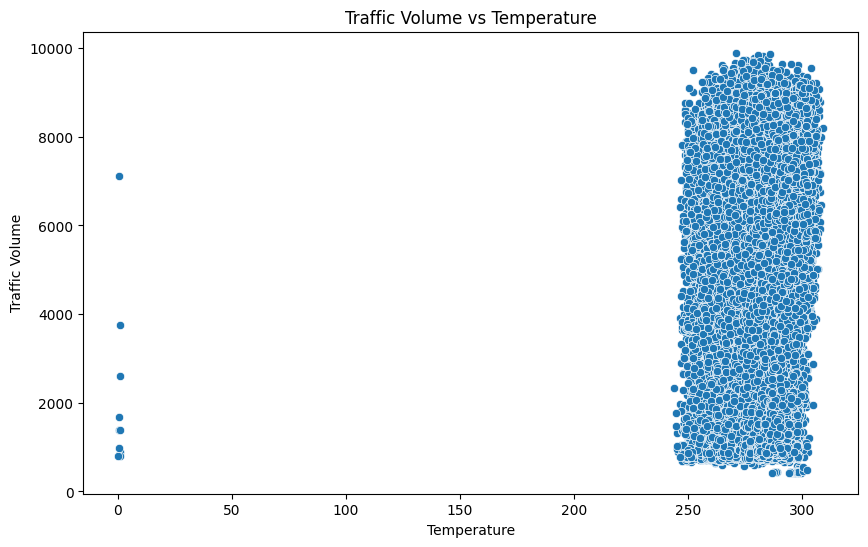

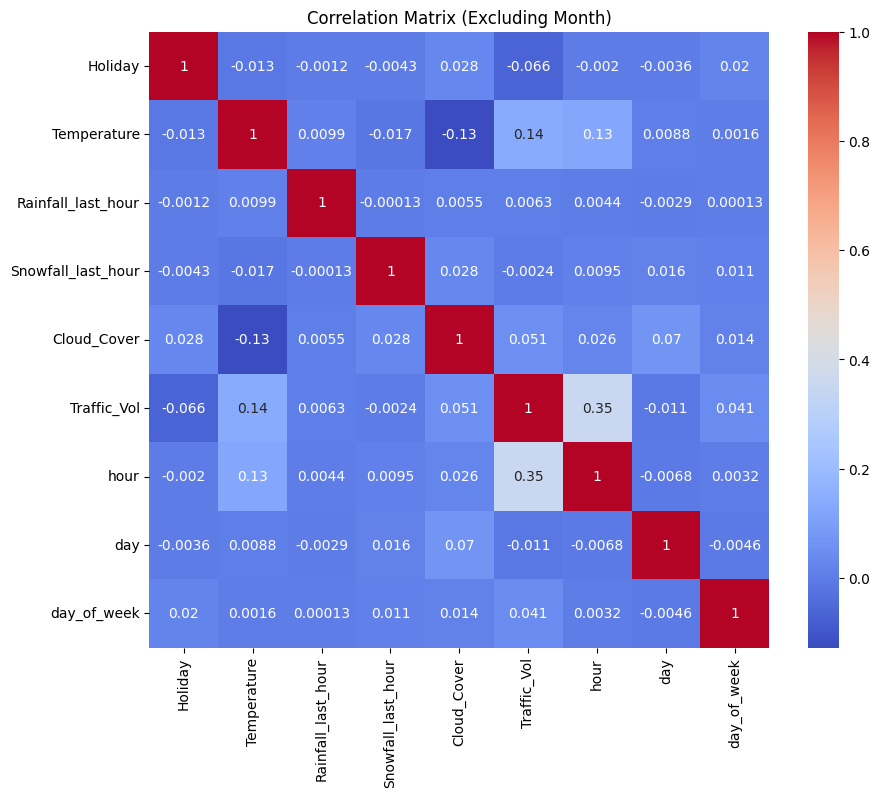

In [ ]:
# Example: Plotting temperature against traffic volume
if 'Temperature' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Temperature', y='Traffic_Vol', data=df)
    plt.title('Traffic Volume vs Temperature')
    plt.xlabel('Temperature')
    plt.ylabel('Traffic Volume')
    plt.show()

df_numeric = df.select_dtypes(include=[np.number])

# Drop the 'month' column, since it's cyclical and might distort the correlation
df_numeric = df_numeric.drop(columns=['month'], errors='ignore')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Excluding Month)')
plt.show()

In [ ]:
zero_temp_rows = df[df['Temperature'] <10]
print(zero_temp_rows)

       Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  \
10079        0          0.8                 0.0                 0.0   
10080        0          0.4                 0.0                 0.0   
10081        0          0.9                 0.0                 0.0   
10082        0          0.5                 0.0                 0.0   
10127        0          0.8                 0.0                 0.0   
10128        0          0.3                 0.0                 0.0   
10129        0          0.4                 0.0                 0.0   
10130        0          1.0                 0.0                 0.0   
10131        0          0.7                 0.0                 0.0   
10132        0          1.0                 0.0                 0.0   

       Cloud_Cover      Weather Weather_Desc           TimeStamp  Traffic_Vol  \
10079            0  Clear skies  Clear skies 2017-01-31 03:00:00       892.32   
10080            0  Clear skies  Clear skies 2017-01-31 

---

## **Data Cleaning & Preprocessing**

Here, we handle missing values, remove outliers based on temperature ranges, and address any potential data quality issues.

### **Temperature Filtering**

We filter out unrealistic temperature values (below 180K or above 330K). We consider these as outliers for typical Earthly conditions.


In [ ]:
import pandas as pd

# Let's assume valid temperatures in Kelvin are roughly between 180K (-93°C) and 330K (57°C).
# Adjust these thresholds if your region experiences more extreme weather.

valid_temp_mask = (df['Temperature'] >= 180) & (df['Temperature'] <= 330)

# Separate valid rows and outliers
df_valid = df[valid_temp_mask].copy()
df_outliers = df[~valid_temp_mask].copy()

print("Valid temperature rows:", df_valid.shape)
print("Outlier rows:", df_outliers.shape)

Valid temperature rows: (29990, 13)
Outlier rows: (10, 13)


In [ ]:
# Check for missing values
print(df.isnull().sum())

Holiday               0
Temperature           0
Rainfall_last_hour    0
Snowfall_last_hour    0
Cloud_Cover           0
Weather               0
Weather_Desc          0
TimeStamp             0
Traffic_Vol           0
hour                  0
day                   0
day_of_week           0
month                 0
dtype: int64


<Figure size 1000x600 with 0 Axes>

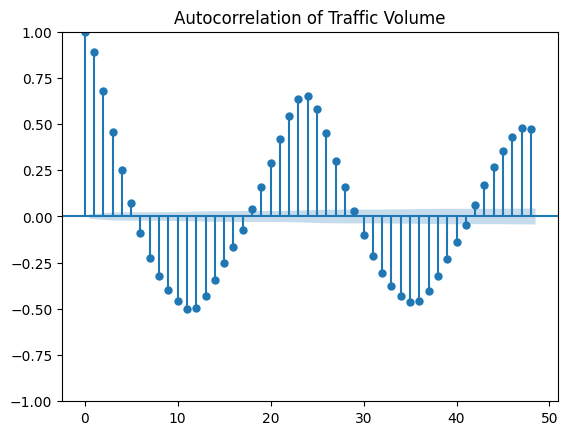

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Make sure to drop any NaNs and consider a subset of lags (for example, lags=48 for two days of hourly data)
plt.figure(figsize=(10, 6))
plot_acf(df_valid['Traffic_Vol'].dropna(), lags=48)
plt.title("Autocorrelation of Traffic Volume")
plt.show()


In [ ]:
# To see unique values in the 'Weather_Desc' column:
unique_weather_desc = df['Weather_Desc'].unique()
print("Unique values in Weather_Desc:", unique_weather_desc)

# And for the 'Weather' column:
unique_weather = df['Weather'].unique()
print("Unique values in Weather:", unique_weather)


Unique values in Weather_Desc: ['Partly cloudy skies' 'Fragmented clouds' 'Full cloud cover'
 'Clear skies' 'Scattered clouds' 'Soft rain' 'Mild drizzle' 'Fine fog'
 'Dense fog' 'Nearby rain showers' 'Steady rain' 'Light rain'
 'Intense rainfall' 'Approaching thunderstorm' 'Smoky air' 'Deep snow'
 'Storm with mild rain' 'Snowfall' 'Drizzle mixed with snow'
 'Gentle rain shower' 'Sudden windstorm'
 'Approaching thunderstorm with rain' 'Storm with rain'
 'Severe storm with heavy rain' 'Strong drizzle' 'Torrential downpour'
 'Storm with a light sprinkle' 'Stormy weather' 'Flurries'
 'Airborne smoke' 'Ice rain' 'Scattered snowflakes' 'Icy rain']
Unique values in Weather: ['Cloudy skies' 'Clear skies' 'Rainfall' 'Light rain' 'Light fog'
 'Dense fog' 'Stormy weather' 'Airborne particles' 'Snowfall'
 'Sudden windstorm' 'Airborne smoke']


### **Weather Grouping and Encoding**

We map detailed weather descriptions to broader categories (e.g., "cloudy," "rain," "fog") and one-hot encode them.


In [ ]:
# Define the mapping dictionary for detailed weather descriptions
weather_desc_mapping = {
    # Clear
    'Clear skies': 'Clear',

    # Cloudy
    'Partly cloudy skies': 'Cloudy',
    'Fragmented clouds': 'Cloudy',
    'Full cloud cover': 'Cloudy',
    'Scattered clouds': 'Cloudy',

    # Rain/Drizzle
    'Soft rain': 'Rain',
    'Mild drizzle': 'Rain',
    'Light rain': 'Rain',
    'Steady rain': 'Rain',
    'Intense rainfall': 'Rain',
    'Storm with mild rain': 'Rain',
    'Gentle rain shower': 'Rain',
    'Approaching thunderstorm with rain': 'Rain',
    'Storm with rain': 'Rain',
    'Severe storm with heavy rain': 'Rain',
    'Strong drizzle': 'Rain',
    'Torrential downpour': 'Rain',
    'Storm with a light sprinkle': 'Rain',
    'Ice rain': 'Rain',
    'Icy rain': 'Rain',

    # Fog
    'Fine fog': 'Fog',
    'Dense fog': 'Fog',

    # Snow
    'Deep snow': 'Snow',
    'Snowfall': 'Snow',
    'Drizzle mixed with snow': 'Snow',
    'Scattered snowflakes': 'Snow',
    'Flurries': 'Snow',

    # Thunderstorm
    'Approaching thunderstorm': 'Thunderstorm',

    # Wind
    'Sudden windstorm': 'Wind',

    # Air Quality / Smoke
    'Smoky air': 'Air Quality'
}

# Apply the mapping to create a new grouped column in df_valid
df_valid['Weather_Desc_Grouped'] = df_valid['Weather_Desc'].map(weather_desc_mapping)

# Optional: Drop the original 'Weather' column if you don't need it to reduce overfitting risk
df_valid = df_valid.drop(columns=['Weather'], errors='ignore')

# Inspect the results
print(df_valid[['Weather_Desc', 'Weather_Desc_Grouped']].head())


          Weather_Desc Weather_Desc_Grouped
0  Partly cloudy skies               Cloudy
1    Fragmented clouds               Cloudy
2     Full cloud cover               Cloudy
3     Full cloud cover               Cloudy
4    Fragmented clouds               Cloudy


### **Creating Lag Features**

We create a lag feature (`lag_1`) to capture the previous hour’s traffic volume and fill missing values as needed.


<ipython-input-40-215b3bd9cf86>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_valid['lag_1'] = df_valid['lag_1'].fillna(method='bfill')


<Figure size 1000x600 with 0 Axes>

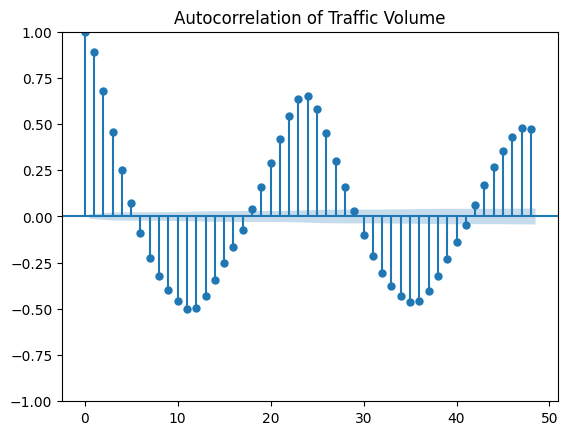

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create a lag feature to capture the previous hour's traffic volume
df_valid['lag_1'] = df_valid['Traffic_Vol'].shift(1)

# Fill NaN values that result from shifting (you could use bfill, ffill, or a specific value)
df_valid['lag_1'] = df_valid['lag_1'].fillna(method='bfill')

# Plot the autocorrelation of the Traffic_Vol column (dropping NaNs if any remain)
plt.figure(figsize=(10, 6))
plot_acf(df_valid['Traffic_Vol'].dropna(), lags=48)
plt.title("Autocorrelation of Traffic Volume")
plt.show()


---

## **Exploratory Analysis & Correlation**

We can now explore the distribution of key features and check correlations.

### **Autocorrelation Plot**

We visualize how traffic volume depends on previous values with an autocorrelation plot.


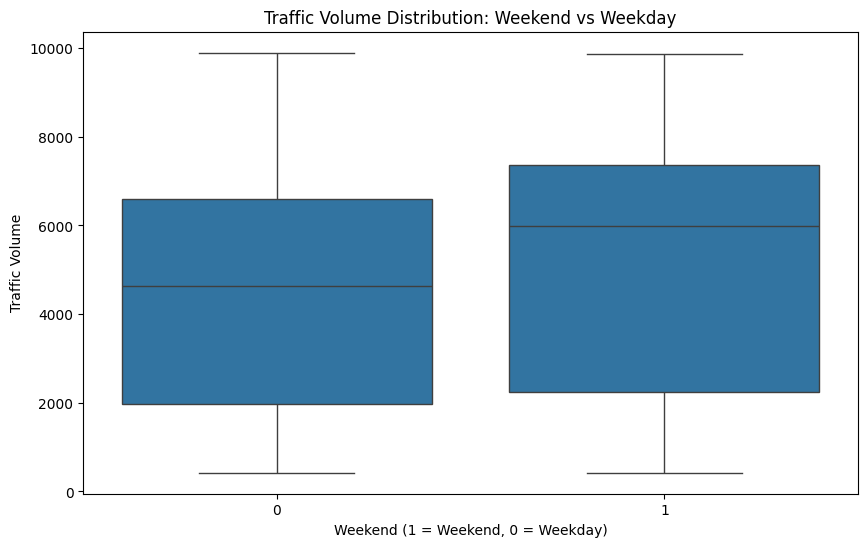

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a weekend flag based on the day_of_week column (assuming Monday=0, Sunday=6)
df_valid['is_weekend'] = df_valid['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Use a box plot to visualize the distribution of traffic volume on weekends vs. weekdays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='Traffic_Vol', data=df_valid)
plt.xlabel("Weekend (1 = Weekend, 0 = Weekday)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Distribution: Weekend vs Weekday")
plt.show()


<ipython-input-41-215b3bd9cf86>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_valid['lag_1'] = df_valid['lag_1'].fillna(method='bfill')


<Figure size 1000x600 with 0 Axes>

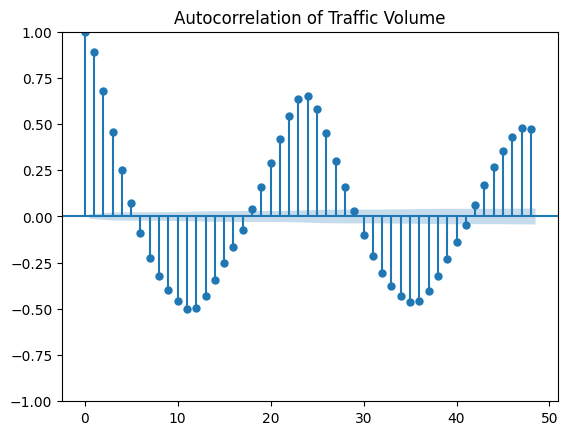

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create a lag feature to capture the previous hour's traffic volume
df_valid['lag_1'] = df_valid['Traffic_Vol'].shift(1)

# Fill NaN values that result from shifting (you could use bfill, ffill, or a specific value)
df_valid['lag_1'] = df_valid['lag_1'].fillna(method='bfill')

# Plot the autocorrelation of the Traffic_Vol column (dropping NaNs if any remain)
plt.figure(figsize=(10, 6))
plot_acf(df_valid['Traffic_Vol'].dropna(), lags=48)
plt.title("Autocorrelation of Traffic Volume")
plt.show()

In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Holiday               29990 non-null  int64         
 1   Temperature           29990 non-null  float64       
 2   Rainfall_last_hour    29990 non-null  float64       
 3   Snowfall_last_hour    29990 non-null  float64       
 4   Cloud_Cover           29990 non-null  int64         
 5   Weather_Desc          29990 non-null  object        
 6   TimeStamp             29990 non-null  datetime64[ns]
 7   Traffic_Vol           29990 non-null  float64       
 8   hour                  29990 non-null  int32         
 9   day                   29990 non-null  int32         
 10  day_of_week           29990 non-null  int32         
 11  month                 29990 non-null  int32         
 12  Weather_Desc_Grouped  29886 non-null  object        
 13  lag_1                

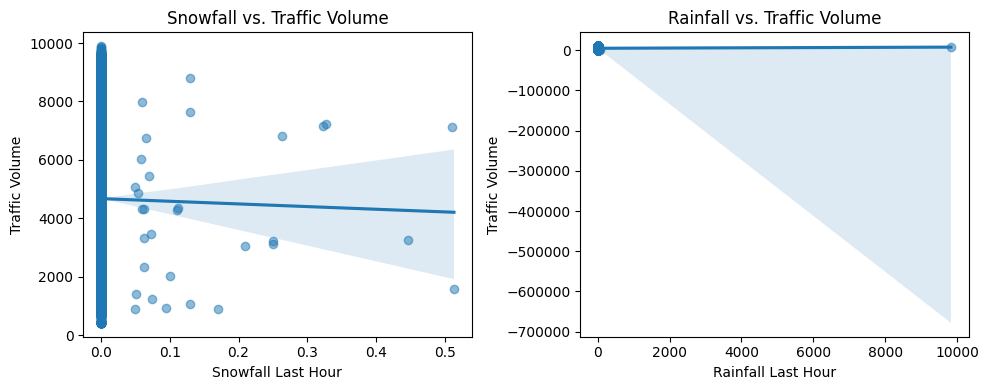

Correlation (Snowfall vs Traffic Volume): -0.002369179314101206
Correlation (Rainfall vs Traffic Volume): 0.00634582061567671


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Snowfall vs. Traffic_Vol
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot #1
sns.regplot(x='Snowfall_last_hour', y='Traffic_Vol', data=df_valid, scatter_kws={'alpha':0.5})
plt.xlabel('Snowfall Last Hour')
plt.ylabel('Traffic Volume')
plt.title('Snowfall vs. Traffic Volume')

# Scatter plot for Rainfall vs. Traffic_Vol
plt.subplot(1, 2, 2)  # plot #2
sns.regplot(x='Rainfall_last_hour', y='Traffic_Vol', data=df_valid, scatter_kws={'alpha':0.5})
plt.xlabel('Rainfall Last Hour')
plt.ylabel('Traffic Volume')
plt.title('Rainfall vs. Traffic Volume')

plt.tight_layout()
plt.show()

# Calculate and print the Pearson correlation coefficients
snow_corr = df_valid['Snowfall_last_hour'].corr(df_valid['Traffic_Vol'])
rain_corr = df_valid['Rainfall_last_hour'].corr(df_valid['Traffic_Vol'])
print("Correlation (Snowfall vs Traffic Volume):", snow_corr)
print("Correlation (Rainfall vs Traffic Volume):", rain_corr)


In [ ]:
df_valid.to_csv('df_cleaned.csv', index=False)

In [ ]:


# Then save your DataFrame to a folder in your Drive
df_valid.to_csv('/content/drive/MyDrive/df_cleaned.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## **Modeling**

We now split our data and train a model (e.g., XGBoost) to predict `Traffic_Vol`.

### **Train-Test Split**

### **Training an XGBoost Regressor**



Test RMSE: 406.1442048798519


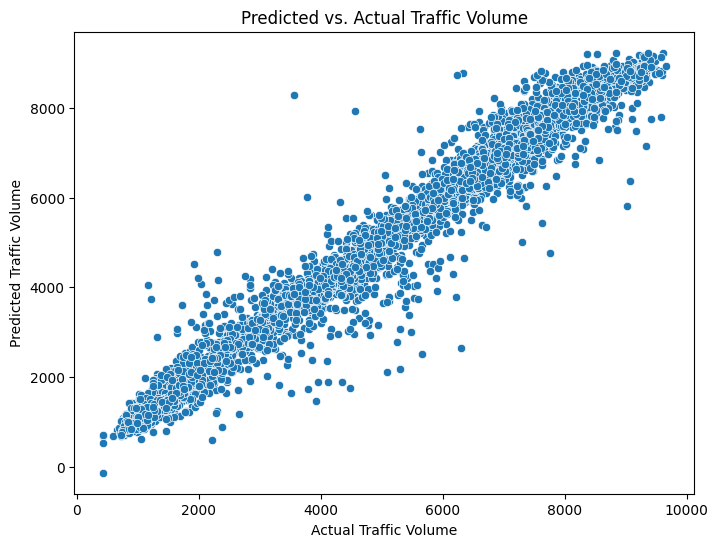

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the DataFrame (df_cleaned) with your final features:
#    - time features (hour, day_of_week, is_weekend, Holiday)
#    - lag features (lag_1, lag_24, snowfall/rainfall_last_hour if needed)
#    - Temperature
#    - grouped weather (Weather_Desc_Grouped)
#    - Traffic_Vol (target)

# One-hot encode the grouped weather descriptions
df_model = pd.get_dummies(df_valid, columns=['Weather_Desc_Grouped'], drop_first=True)

# Drop columns not needed for modeling (e.g., original text columns, timestamps, etc.)
# Including 'TimeStamp' in columns_to_drop
columns_to_drop = ['TimeStamp', 'timestamp', 'Weather', 'Weather_Desc']
df_model = df_model.drop(columns=columns_to_drop, errors='ignore')

# 2. Define features (X) and the target (y)
X = df_model.drop(columns=['Traffic_Vol'])  # Everything except the target
y = df_model['Traffic_Vol']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 4. Build and Train an XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

# 6. (Optional) Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Predicted vs. Actual Traffic Volume')
plt.show()


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Test_df.csv')

---

## **Preparing Test Data and Final Submission**

We replicate all transformations on the test dataset (e.g., `test_data.csv`) and predict using our trained model.

### **Load and Transform Test Data**

### **Generate Final Predictions and Save**

We now predict using the trained model and save the submission as a CSV.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import xgboost as xgb

# 1. Load or define your trained model (already fitted on training data)
#    We'll just assume "model" is in memory. If needed, you can load a saved model:
#    model = xgb.XGBRegressor()
#    model.load_model("my_trained_model.json")

# 2. Load the test data


###############################################################################
# 3. Reproduce ALL Transformations from Training
###############################################################################

# (A) Convert TimeStamp to datetime
df_test['TimeStamp'] = pd.to_datetime(df_test['TimeStamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# (B) Create date/time-based features
df_test['hour'] = df_test['TimeStamp'].dt.hour
df_test['day_of_week'] = df_test['TimeStamp'].dt.dayofweek
df_test['is_weekend'] = df_test['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# (C) If you did holiday logic (propagating holiday flags for the entire day):
df_test['date'] = df_test['TimeStamp'].dt.date
df_test['Holiday'] = df_test['Holiday'].fillna(0).astype(int)
df_test['Holiday'] = df_test.groupby('date')['Holiday'].transform('max')
df_test['Holiday'] = df_test['Holiday'].astype(int)
df_test.drop(columns='date', inplace=True, errors='ignore')

# (D) If you used cyclical encoding for hour/day_of_week, recreate those
df_test['hour_sin'] = np.sin(2 * np.pi * df_test['hour'] / 24)
df_test['hour_cos'] = np.cos(2 * np.pi * df_test['hour'] / 24)
# If you used it for day_of_week as well:
# df_test['dow_sin'] = np.sin(2 * np.pi * df_test['day_of_week'] / 7)
# df_test['dow_cos'] = np.cos(2 * np.pi * df_test['day_of_week'] / 7)

# Drop original hour / day_of_week if you did in training
df_test.drop(columns=['hour', 'day_of_week'], errors='ignore', inplace=True)

# (E) Weather Grouping (Map original weather descriptions to grouped categories)
weather_desc_mapping = {
    'Clear skies': 'Clear',
    'Partly cloudy skies': 'Cloudy',
    'Fragmented clouds': 'Cloudy',
    'Full cloud cover': 'Cloudy',
    'Scattered clouds': 'Cloudy',
    'Soft rain': 'Rain',
    'Mild drizzle': 'Rain',
    'Light rain': 'Rain',
    'Steady rain': 'Rain',
    'Intense rainfall': 'Rain',
    'Storm with mild rain': 'Rain',
    'Gentle rain shower': 'Rain',
    'Approaching thunderstorm with rain': 'Rain',
    'Storm with rain': 'Rain',
    'Severe storm with heavy rain': 'Rain',
    'Strong drizzle': 'Rain',
    'Torrential downpour': 'Rain',
    'Storm with a light sprinkle': 'Rain',
    'Ice rain': 'Rain',
    'Icy rain': 'Rain',
    'Fine fog': 'Fog',
    'Dense fog': 'Fog',
    'Deep snow': 'Snow',
    'Snowfall': 'Snow',
    'Drizzle mixed with snow': 'Snow',
    'Scattered snowflakes': 'Snow',
    'Flurries': 'Snow',
    'Approaching thunderstorm': 'Thunderstorm',
    'Sudden windstorm': 'Wind',
    'Smoky air': 'Air Quality'
    # Make sure this exactly matches your training-time mapping
}

df_test['Weather_Desc_Grouped'] = df_test['Weather_Desc'].map(weather_desc_mapping)

# (F) One-hot encode the grouped weather descriptions
df_test = pd.get_dummies(df_test, columns=['Weather_Desc_Grouped'], drop_first=True)

# (G) Handle temperature filtering (if you removed outliers 180K-330K in training)
#     If you strictly dropped those rows in training, you might want to do the same here or decide how to handle it.

###############################################################################
# 4. Align Columns with Your Training Data
###############################################################################
# - Suppose X_train is your final training DataFrame (features only).
# - We ensure the test set has the same columns.

# Drop columns not used by the model
columns_to_drop = ['TimeStamp', 'Weather', 'Weather_Desc']
df_test.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# If you had a final DataFrame called X_train (your model’s features):
# e.g. training_cols = X_train.columns
training_cols = X_train.columns  # Provide the same columns you trained on

# Add missing columns (e.g., if the test set lacks a dummy variable)
for col in training_cols:
    if col not in df_test.columns:
        df_test[col] = 0

# Drop columns that appear in test but not in training
for col in df_test.columns:
    if col not in training_cols:
        df_test.drop(columns=[col], inplace=True)

# Reorder df_test’s columns to match training exactly
df_test = df_test[training_cols]

###############################################################################
# 5. Predict with the Trained Model
###############################################################################
y_test_pred = model.predict(df_test)

###############################################################################
# 6. Save Predictions
###############################################################################
# Many competitions only require a single "Traffic_Vol" column. Adjust as needed.
submission = pd.DataFrame({'Traffic_Vol': y_test_pred})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv!")


Predictions saved to submission.csv!
